# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings 
%maplotlib inline
warnings.filterwarnings("ignore")

UsageError: Line magic function `%maplotlib` not found.


# Import dataset

In [3]:
df =  pd.read_csv('Train.csv')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Preprocessing of dataset

In [5]:
#statsiscal info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
#data type information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# check for the number of null values in the dataset
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#check for categorical values
cat_val = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        cat_val.append(i)
cat_val

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
cat_val

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
cat_val.remove('Outlet_Identifier')
cat_val

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
#print the categorical columns
for col in cat_val:
    print(col)
    print(df[col].value_counts())
    print()

Item_Identifier
FDW13    10
FDG33    10
NCF42     9
FDG09     9
NCL31     9
         ..
FDN52     1
FDY43     1
DRF48     1
FDO33     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier

In [12]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [13]:
#fill all the null or missing values
#from sklearn.impute import SimpleImputer

In [14]:
#imputer = SimpleImputer(missing_values=np.nan,strategy="most_frequent")

In [15]:
#df1 = imputer.fit_transform(df)

In [16]:
item_weight_mean = df.pivot_table(values = "Item_Weight", index = "Item_Identifier")
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [17]:
miss_bool = df.Item_Weight.isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [18]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df["Item_Weight"][i] = item_weight_mean.loc[item]["Item_Weight"]
        else:
            df["Item_Weight"][i] = np.mean(df['Item_Weight'])

C:\Users\BRAKAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
df.Item_Weight.isnull().sum()

0

In [20]:
outlet_size_mode = df.pivot_table( values="Outlet_Size", columns= "Outlet_Type", aggfunc =(lambda x : x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [21]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, "Outlet_Size"]  = df.loc[miss_bool, "Outlet_Type"].apply(lambda x:outlet_size_mode[x])

In [22]:
#replace zeros with mean in item_visibility
df.loc[:,"Item_Visibility"].replace([0], [df.Item_Visibility.mean()], inplace = True)

In [23]:
sum(df.Item_Visibility ==0)

0

In [24]:
#combine item_fat content values
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"})

In [25]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# CREATION OF NEW ATTRIBUTES

In [26]:
df["New_Item_Type"] = df["Item_Identifier"].apply(lambda x : x[:2])

In [27]:
df.New_Item_Type

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [28]:
df["New_Item_Type"] = df["New_Item_Type"].map({"FD":"Food","DR":"Drinks","NC":"Non_Consumable"})

In [29]:
df["New_Item_Type"].value_counts() 

Food              6125
Non_Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [39]:
df.loc[df["New_Item_Type"]=="Non_Consumable","Item_Fat_Content"] = "Non_Edible"


In [40]:
df["Item_Fat_Content"].value_counts() 

Low Fat       3918
Regular       3006
Non_Edible    1599
Name: Item_Fat_Content, dtype: int64

In [30]:
#create small value for establishment year
df["Outlet_Year"] = 2013 - df["Outlet_Establishment_Year"]

In [31]:
df["Outlet_Year"]

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Year, Length: 8523, dtype: int64

# Exploratory Data Analysis

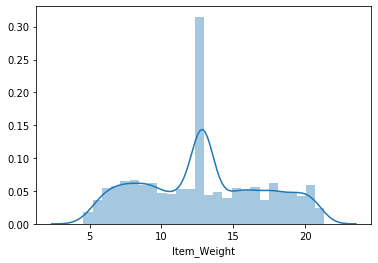

In [32]:
sn.distplot(df["Item_Weight"])

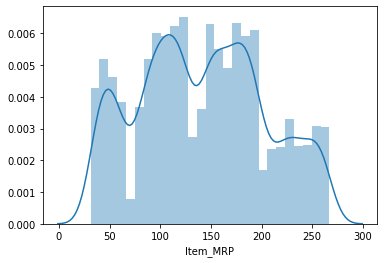

In [33]:
sn.distplot(df["Item_MRP"])

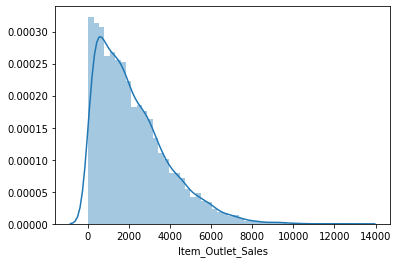

In [34]:
sn.distplot(df["Item_Outlet_Sales"])

In [35]:
#Log transformation
df["Item_Outlet_Sales"] = np.log(1+df["Item_Outlet_Sales"])

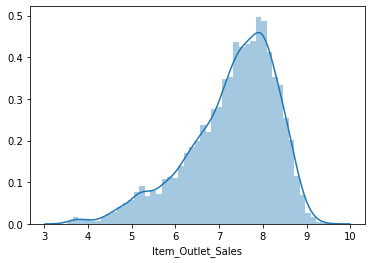

In [37]:
sn.distplot(df["Item_Outlet_Sales"])

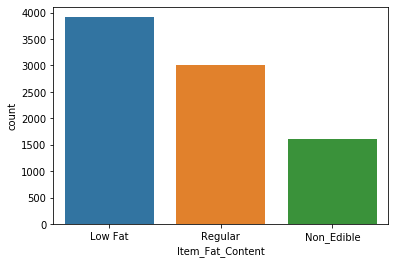

In [41]:
#plotting of categorical values
sn.countplot(df["Item_Fat_Content"])

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

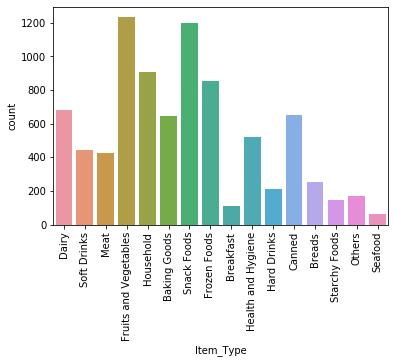

In [48]:
l = list(df["Item_Type"].unique())
chart = sn.countplot(df["Item_Type"])
chart.set_xticklabels(labels = l, rotation = 90) 

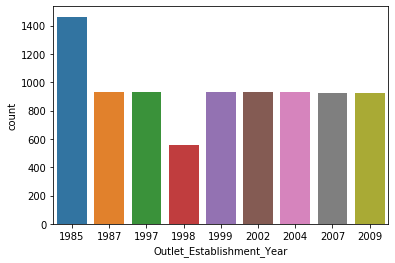

In [49]:
sn.countplot(df["Outlet_Establishment_Year"])

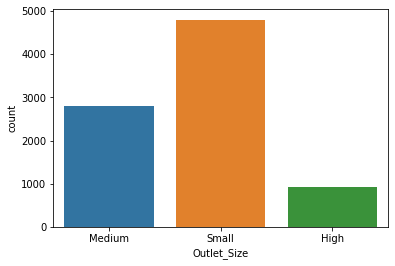

In [50]:
sn.countplot(df["Outlet_Size"])

[Text(0, 0, 'Supermarket Type1'),
 Text(0, 0, 'Supermarket Type2'),
 Text(0, 0, 'Grocery Store'),
 Text(0, 0, 'Supermarket Type3')]

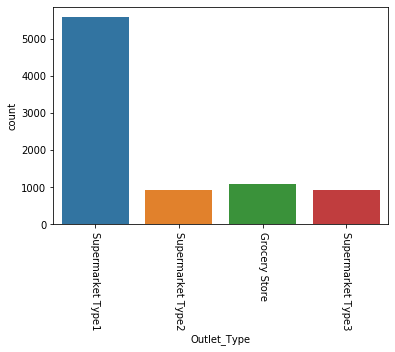

In [52]:
s = list(df["Outlet_Type"].unique())
chart = sn.countplot(df["Outlet_Type"])
chart.set_xticklabels(labels = s, rotation = 270)

# correlation matrix

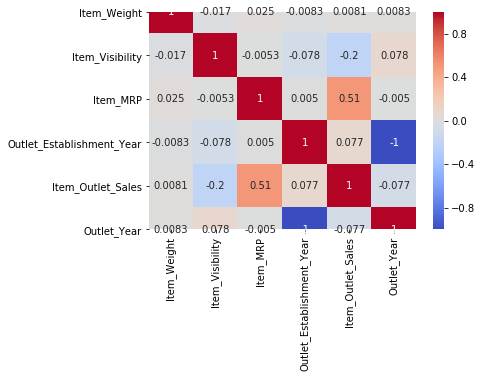

In [55]:
corr = df.corr()
sn.heatmap(corr, annot = True, cmap = "coolwarm")

# #Label Encoder

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le  = LabelEncoder()

In [58]:
df["Outlet"] = le.fit_transform(df["Outlet_Identifier"])

In [60]:
cat_col = ["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type","New_Item_Type"]
for col in cat_col:
    df[col] = le.fit_transform(df[col])

# Input - split

In [61]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Year,Outlet
0,FDA15,9.300,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,14,9
1,DRC01,5.920,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,4,3
2,FDN15,17.500,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,14,9
3,FDX07,19.200,2,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,15,0
4,NCD19,8.930,1,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,13,214.5218,OUT013,1987,0,2,1,7.929984,1,26,1
8519,FDS36,8.380,2,0.046982,0,108.1570,OUT045,2002,2,1,1,6.310436,1,11,7
8520,NCJ29,10.600,1,0.035186,8,85.1224,OUT035,2004,2,1,1,7.085159,2,9,6
8521,FDN46,7.210,2,0.145221,13,103.1332,OUT018,2009,1,2,2,7.521100,1,4,3


In [66]:
X = df.drop(columns=["Item_Identifier", "Outlet_Identifier", "Outlet_Establishment_Year", "Item_Outlet_Sales"])
Y = df["Item_Outlet_Sales"]

# Model Training

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


In [73]:
def train(model, X, Y):
    #train the model
    model.fit(X,Y)
    
    #predict the training set
    pred = model.predict(X)
    
    #perform cross validation
    cv_score = cross_val_score(model, X, Y, scoring="neg_mean_squared_error")
    cv_score = np.abs(np.mean(cv_score))
    print("Model Report")
    print("MSE:",mean_squared_error(Y,pred))
    print("CV SCORE:", cv_score)

In [69]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso


Model Report
MSE: 0.43277474914395264
CV SCORE: 0.4345681225062437


C:\Users\BRAKAY\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


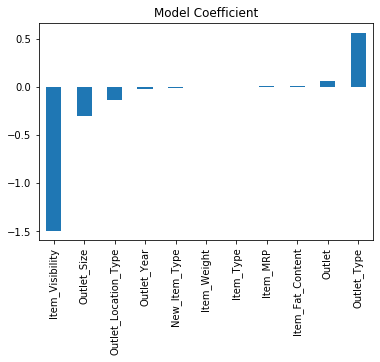

In [74]:
model = LinearRegression(normalize=True)
train(model, X, Y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind = "bar", title = "Model Coefficient")

In [76]:
from sklearn.tree import DecisionTreeRegressor

C:\Users\BRAKAY\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Model Report
MSE: 8.847037337212823e-11
CV SCORE: 0.5963598641236406


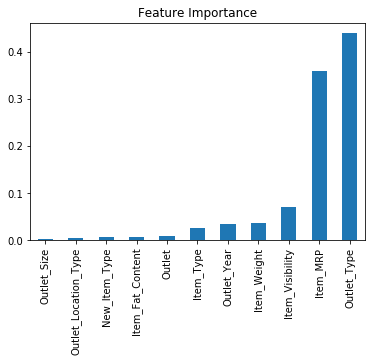

In [78]:
model = DecisionTreeRegressor()
train(model, X, Y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values()
coef.plot(kind = "bar", title = "Feature Importance")

In [79]:
from sklearn.ensemble import RandomForestRegressor

C:\Users\BRAKAY\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\BRAKAY\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Model Report
MSE: 0.059063766459897936
CV SCORE: 0.3338741691563101


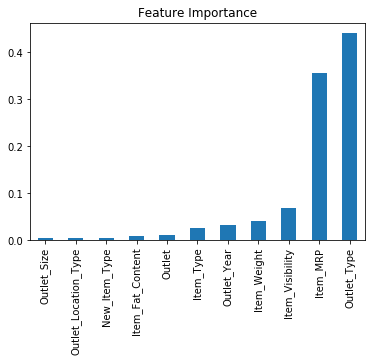

In [80]:
model = RandomForestRegressor()
train(model, X, Y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values()
coef.plot(kind = "bar", title = "Feature Importance")